# Метод k-средних (k-means clustering)

## Задание 1
1. Реализовать kmeans
2. Визуализировать сходимость центров кластеров
3. Оценить $SSE$ для значений $k = 1, \ldots, 10$ и построить график зависимости $SSE$ от количества кластеров.

In [119]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random
import numpy as np

Дано 5 классов:

In [120]:
X, Y = make_blobs(n_samples = 500, centers=5, n_features=2, cluster_std = 1, random_state=17)

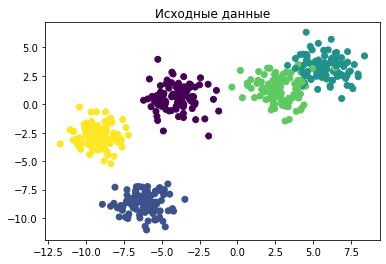

In [121]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Исходные данные');

На вход алгоритм получает матрицу данных $X$, количество кластеров $k$, и критерий остановки $\epsilon$:

In [122]:
class KMeans(object):
    
    def __init__(self, k = 5, eps = 0.001):
        self.k = k
        self.eps = eps
        self.centroids = []
    
    """
    Метод выбирает k случайных центров (k средних)
    
    """
    def _init_centroids(self, data, k):
        return data[np.random.choice(len(data), size = k, replace = False)]
    
    """
    Метод вычисляет евклидову меру
    
    """
    def _euclidean_distance(self, obj, data):
        return np.sum((obj - data) ** 2, axis = 1)
    
    """
    Метод присоединяет все объекты к ближайшим кластерам
    
    """
    def _add_objects_to_clusters(self, data, centroids):
        clusters = []        
        for obj in data:
            distances = self._euclidean_distance(obj, centroids)
            # Ищем для каждой точки ближайший центроид
            val, index = min((val, index) for (index, val) in enumerate(distances))
            # Присваиваем точке кластер
            clusters.append(index)
        return np.array(clusters)
    
    """
    Метод минимизирует полную сумму квадратов расстояний от каждой точки
    до среднего значения назначенного ей кластера
    
    """
    def fit(self, data):
        self.centroids = self._init_centroids(data, self.k)     
        clusters = self._add_objects_to_clusters(data, self.centroids)
        
        old_centroids = []
        # Если центроиды не изменились, то останавливаемся и сохраняем кластеры
        while len(old_centroids) == 0 or np.sum((self.centroids - old_centroids) ** 2, axis = 1).all() < self.eps:
        
            old_centroids = self.centroids.copy()
            for cluster in range(self.k):
                # Берём все точки, относящиеся к текущей центроиде
                obj_in_cluster = data[clusters == cluster]
                # Пересчитываем координаты кластера, помещаем в центр масс точек
                self.centroids[cluster] = obj_in_cluster.mean(axis = 0)

            # Cнова ищем для каждой точки ближайший центроид   
            clusters = self._add_objects_to_clusters(data, self.centroids)
        
        return
    
    """
    Метод разбивает объекты в выборке на кластеры
    
    """
    def predict(self, data):
        clusters = self._add_objects_to_clusters(data, self.centroids)
        return clusters
    
    """
    Метод рассчитывает сумму квадратов расстояний между центроидом и каждым объектом кластера
    
    """
    def _sse_for_cluster(self, obj_in_cluster, centroid):
        return np.sum((obj_in_cluster - centroid) ** 2)
    
    """
    Метод рассчитывает сумму квадратических ошибок (SSE, sum of squared error)
    
    """
    def SSE(self, data):
        clusters = self._add_objects_to_clusters(data, self.centroids)
        sse_list = []
        for cluster in range(self.k):
            # Берём все точки, относящиеся к текущей центроиде
            obj_in_cluster = data[clusters == cluster]
            sse_list.append(self._sse_for_cluster(obj_in_cluster, self.centroids[cluster]))
        return np.array(sse_list).mean()
    

In [123]:
km = KMeans()
km.fit(X)

In [124]:
km.predict(X)

array([0, 4, 0, 3, 3, 1, 3, 3, 3, 1, 4, 1, 2, 4, 3, 3, 3, 2, 3, 1, 3, 2,
       4, 0, 4, 3, 4, 3, 0, 1, 4, 2, 2, 1, 2, 3, 2, 1, 3, 3, 2, 2, 2, 3,
       4, 3, 0, 3, 3, 1, 0, 3, 2, 1, 3, 3, 2, 3, 2, 4, 3, 3, 3, 3, 1, 3,
       1, 3, 3, 3, 0, 3, 1, 1, 4, 3, 0, 2, 3, 3, 3, 2, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 3, 1, 4, 2, 0, 2, 1, 3, 3, 3, 0, 0, 1, 3, 1, 1, 3, 3, 3,
       3, 2, 1, 2, 2, 1, 3, 2, 4, 3, 1, 2, 3, 3, 3, 2, 3, 4, 2, 3, 0, 2,
       0, 3, 1, 2, 1, 1, 0, 3, 4, 1, 3, 3, 2, 1, 2, 4, 0, 1, 4, 1, 3, 2,
       2, 0, 2, 4, 1, 2, 1, 3, 3, 4, 3, 2, 3, 2, 3, 3, 0, 3, 1, 2, 3, 2,
       1, 3, 2, 4, 3, 3, 1, 2, 0, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 2,
       2, 4, 4, 3, 1, 1, 3, 2, 0, 4, 3, 2, 3, 3, 3, 1, 1, 3, 3, 1, 4, 2,
       3, 4, 0, 3, 1, 3, 3, 3, 4, 3, 2, 3, 2, 0, 0, 4, 2, 2, 2, 3, 4, 0,
       2, 2, 3, 2, 3, 4, 1, 3, 3, 3, 1, 4, 0, 3, 1, 3, 1, 2, 3, 4, 3, 0,
       0, 1, 1, 0, 2, 4, 3, 2, 4, 1, 3, 3, 1, 4, 2, 2, 2, 3, 3, 4, 2, 1,
       4, 1, 3, 0, 3, 3, 4, 2, 1, 2, 2, 2, 3, 3, 1,

Визуализируем полученные кластеры для значений $k = 1, \ldots, 10$

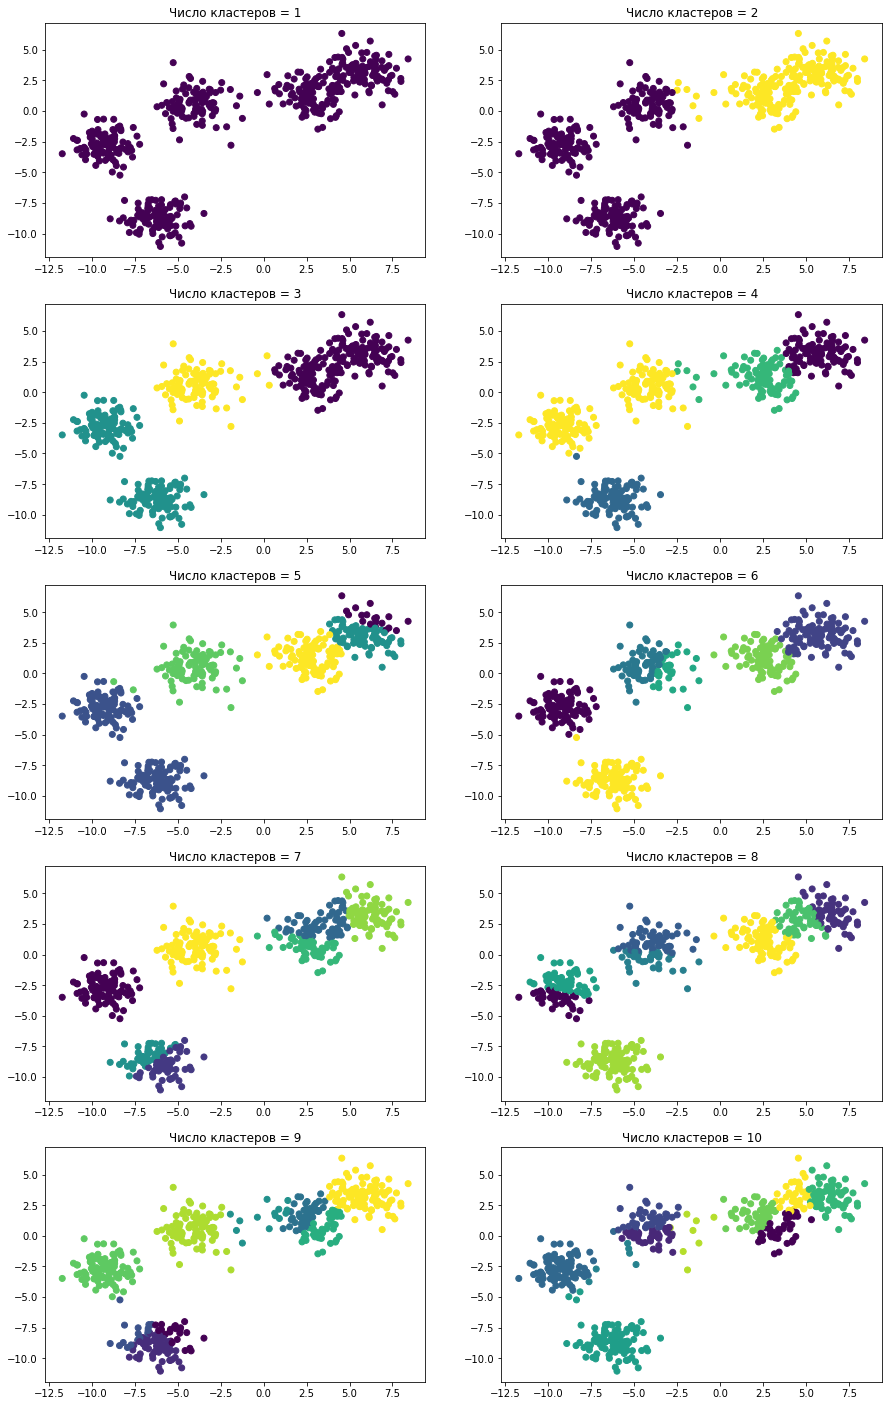

In [125]:
plt.figure(figsize=(15, 25))

for k in range(1, 11):
    km = KMeans(k = k)
    clusters = km.fit(X)
    clusters = km.predict(X)
    plt.subplot(5, 2, k)
    plt.scatter(X[:, 0], X[:, 1], c = clusters)
    plt.title(f"Число кластеров = {k}")
    
plt.show()

Оценим $SSE$ для значений $k = 1, \ldots, 10$ и построим график зависимости $SSE$ от количества кластеров

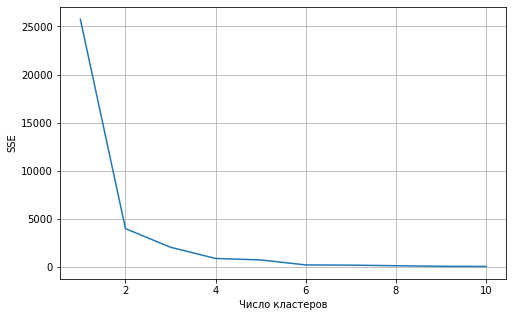

In [126]:
sse_values = []

for k in range(1, 11):
    km = KMeans(k = k)
    clusters = km.fit(X)
    sse_values.append(km.SSE(X))
    
plt.subplots(figsize=(8, 5))
plt.plot(range(1, 11), sse_values)
plt.xlabel('Число кластеров')
plt.ylabel('SSE')
plt.grid()
plt.show()